## Tareas Faltantes
## Mateo Ruiz Navarro
## 201418281

## Tarea No.6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import write, read
from numpy.fft import fft, ifft, fftfreq
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

## Ejercicio 1. Construcción de señales de sonidos musicales usando espectros de frecuencia (Guitarra y Piano).

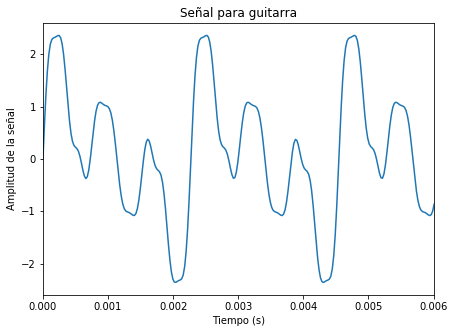

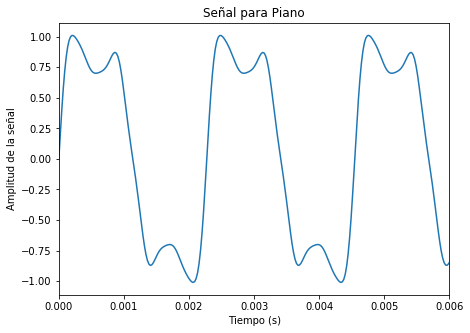

In [2]:
# Parte 1.a
DT = 5     # Intervalo de Tiempo
f0 = 440   # Frecuencia
fs = 44100   # Sampling rate: measurements per second

# Instrumento No.1 : Guitarra
f2g,f3g,f4g,f5g,f6g,f9g,f10g = 2*f0,3*f0,4*f0,5*f0,6*f0,9*f0,10*f0 # Armonicos en la guitarra
a2g,a3g,a4g,a5g,a6g,a9g,a10g = 0.65,1.3,0.15,0.15,0.1,0.2,0.05     # Amplitudes para guitarra

# Organizamos los armonicos y amplitudes de vectores
Fg = [f2g,f3g,f4g,f5g,f6g,f9g,f10g]                                
Ag = [a2g,a3g,a4g,a5g,a6g,a9g,a10g]

# Instrumento No.1 : Piano
f2p,f3p,f4p,f5p,f6p,f8p = 2*f0,3*f0,4*f0,5*f0,6*f0,8*f0       # Armonicos en la Piano
a2p,a3p,a4p,a5p,a6p,a8p = 0.1,0.35,0.075,0.05,0.05,0.025,     # Amplitudes para Piano

# Organizamos los armonicos y amplitudes de vectores
Fp = [f2p,f3p,f4p,f5p,f6p,f8p]                                
Ap = [a2p,a3p,a4p,a5p,a6p,a8p]

# Vector de tiempos y señales
t = np.linspace(0, 5, 5*fs, endpoint = False)

# Ahora creamos las señales
# Guitarra
XG = np.sin(f0*2*np.pi*t)
for i in range(len(Fg)):
    XG += Ag[i]* np.sin(Fg[i]*2*np.pi*t)
    
# Piano
XP = np.sin(f0*2*np.pi*t)
for i in range(len(Fp)):
    XP += Ap[i]* np.sin(Fp[i]*2*np.pi*t)

# Gráfica señal Guitarra
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t, XG)
ax.set_title('Señal para guitarra')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud de la señal')
ax.set_xlim(0,0.006)

# Gráfica señal Piano
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t, XP)
ax.set_title('Señal para Piano')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud de la señal')
ax.set_xlim(0,0.006)

# Parte 1.b
# Se generan los archivos de audio
A_max = 32767     # Max. amplitude

Sguitarra = np.int16( XG  * A_max / np.max(np.abs(XG))  )
write('1_guiattra.wav', 44100, Sguitarra)

Spiano = np.int16( XP  * A_max / np.max(np.abs(XP))  )
write('1_piano.wav', 44100, Spiano)





## Ejercicio 2. Construcción de espectro de Frecuencia para señal de Diente de Sierra y señal Cuadrada.

Text(0.5,1,'Análisis de Fourier se una Onda de sierra con 440 Hz de Frecuencia')

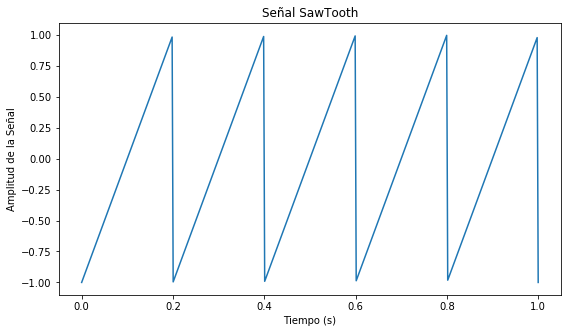

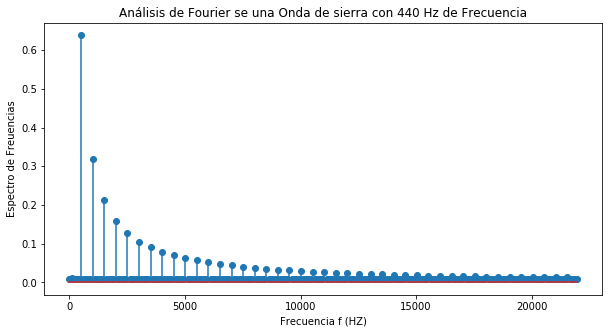

In [3]:
# Parte 2.a
# ONDA DE SIERRA

f = 440
T = 1/f # periodo de la SawTooth

# Usamos la libreria Spicy, el modulo singal para graficar la función Onda de sierra
t  = np.linspace(0, 1, f)
Os = signal.sawtooth(2 * np.pi * 5 * t)

# Ahora graficamps la función.

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(t, Os)
ax.set_title('Señal SawTooth')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud de la Señal')

# Con la función, llevamos a cabo el análisis de Fourier.

AF = fft(Os)
AF = (AF * 2) / len(Os)
Discreta = fftfreq(len(Os)) * fs
Positivas = Discreta >= 0

fig, ax = plt.subplots(figsize=(10,5))
ax.stem(Discreta[Positivas], np.absolute(AF[Positivas]))
ax.set_xlabel('Frecuencia f (HZ)')
ax.set_ylabel('Espectro de Freuencias')
ax.set_title('Análisis de Fourier se una Onda de sierra con 440 Hz de Frecuencia')



Text(0.5,1,'Análisis de Fourier se una Onda Cuadrada con 440 Hz de Frecuencia')

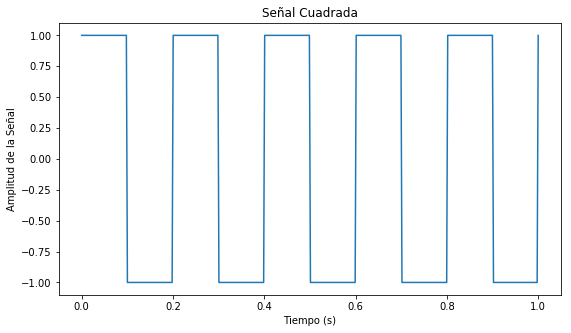

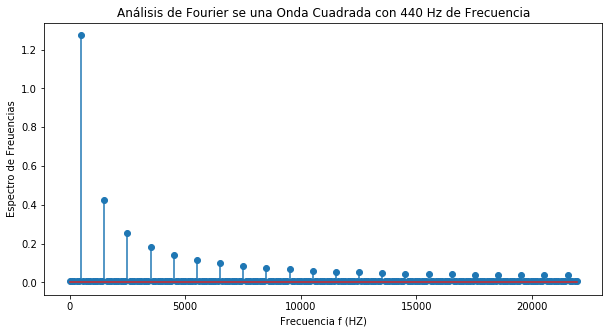

In [4]:
# Parte 2.b
# ONDA CUADRADA

f = 440
T = 1/f # periodo de la SawTooth

# Usamos la libreria Spicy, el modulo singal para graficar la función Onda de sierra
t  = np.linspace(0, 1, f)
Os = signal.square(2 * np.pi * 5 * t)

# Ahora graficamps la función.

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(t, Os)
ax.set_title('Señal Cuadrada')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud de la Señal')

# Con la función, llevamos a cabo el análisis de Fourier.

AF = fft(Os)
AF = (AF * 2) / len(Os)
Discreta = fftfreq(len(Os)) * fs
Positivas = Discreta >= 0

fig, ax = plt.subplots(figsize=(10,5))
ax.stem(Discreta[Positivas], np.absolute(AF[Positivas]))
ax.set_xlabel('Frecuencia f (HZ)')
ax.set_ylabel('Espectro de Freuencias')
ax.set_title('Análisis de Fourier se una Onda Cuadrada con 440 Hz de Frecuencia')




# Ejercicio 3.

In [5]:
# Parte 3.a
# Cargamos el audio
Audio('severla_000.wav')


In [6]:
# Parte 3.b
# Extraemos su tasa de toma de datos y su longitud
TasaDatos, Señal = wavfile.read('severla_000.wav')
LD = Señal.shape[0] # Longitud Datos
Duracion = LD/TasaDatos
print("La rata de toma de datos es:")
print(TasaDatos)
print(" ")
print("La Longitud del array de los datos es:")
print(LD)
print(" ")
print("La Duración de la señal(Audio) es de : " + str(Duracion) + " segundos")
print(LD)

La rata de toma de datos es:
16000
 
La Longitud del array de los datos es:
104578
 
La Duración de la señal(Audio) es de : 6.536125 segundos
104578


(0, 0.5)

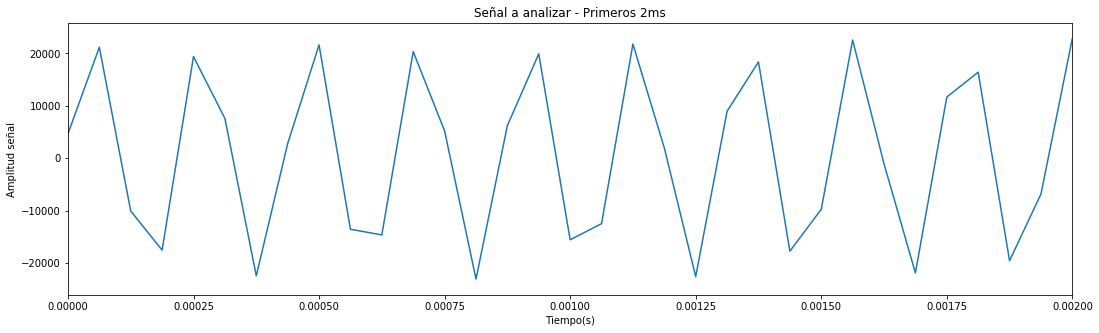

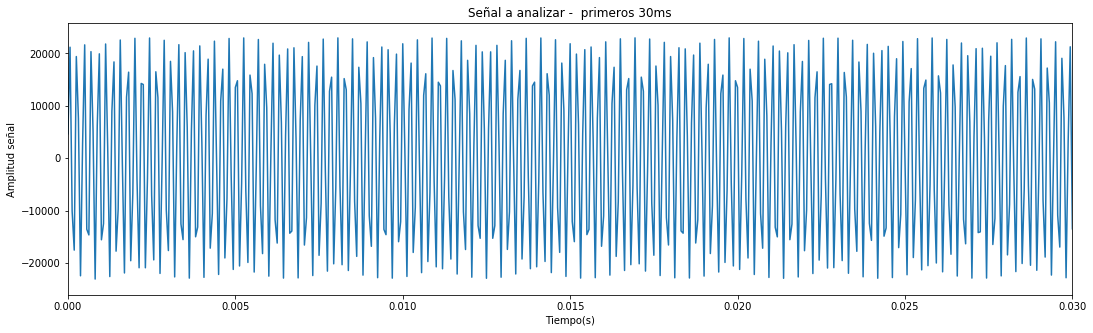

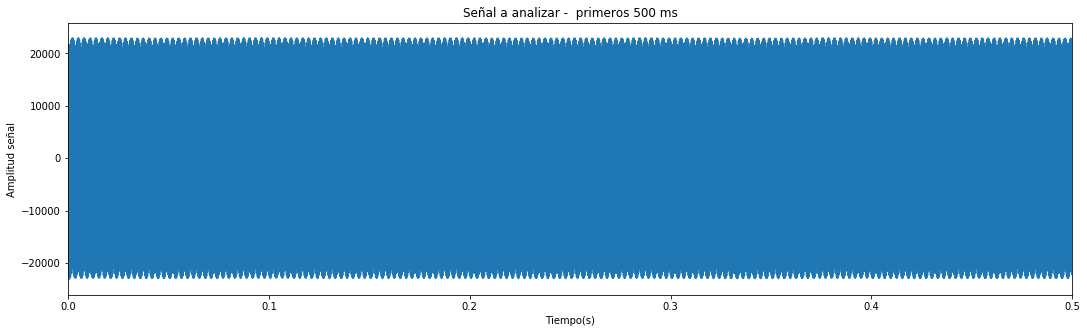

In [7]:
#Parte 3.c
# Grafiqemos la señal
tiempo = np.arange(LD)
tiempo = tiempo/TasaDatos
# Grafiquemos para los primeros 2 ms, 30ms y 500 ms
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(tiempo,Señal)
ax.set_xlabel('Tiempo(s)')
ax.set_ylabel('Amplitud señal')
ax.set_title('Señal a analizar - Primeros 2ms')
ax.set_xlim(0,2*10**(-3))

fig, ax = plt.subplots(figsize=(18,5))
ax.plot(tiempo,Señal)
ax.set_xlabel('Tiempo(s)')
ax.set_ylabel('Amplitud señal')
ax.set_title('Señal a analizar -  primeros 30ms')
ax.set_xlim(0,30*10**(-3))

fig, ax = plt.subplots(figsize=(18,5))
ax.plot(tiempo,Señal)
ax.set_xlabel('Tiempo(s)')
ax.set_ylabel('Amplitud señal')
ax.set_title('Señal a analizar -  primeros 500 ms')
ax.set_xlim(0,500*10**(-3))


In [8]:
# Parte 3.d
AF = fft(Señal)
AF = (AF * 2) / len(Señal)
Discreta = fftfreq(len(Señal)) * TasaDatos
Positivas = Discreta >= 0


Text(0.5,1,'Análisis de Fourier de la señal en escala logaritmica')

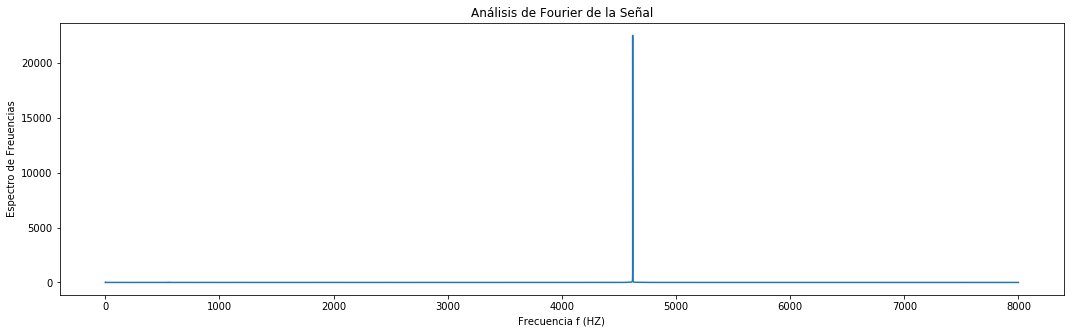

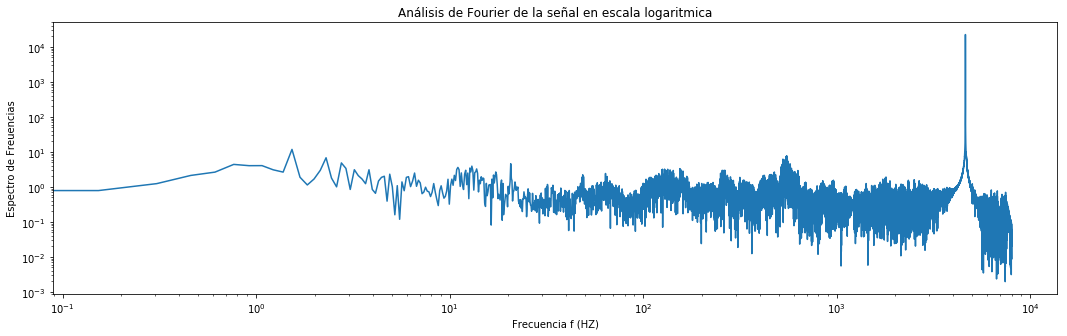

In [9]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(Discreta[Positivas], np.absolute(AF[Positivas]))
ax.set_xlabel('Frecuencia f (HZ)')
ax.set_ylabel('Espectro de Freuencias')
ax.set_title('Análisis de Fourier de la Señal')

fig, ax = plt.subplots(figsize=(18,5))
ax.loglog(Discreta[Positivas], np.absolute(AF[Positivas]))
ax.set_xlabel('Frecuencia f (HZ)')
ax.set_ylabel('Espectro de Freuencias')
ax.set_title('Análisis de Fourier de la señal en escala logaritmica')

In [10]:
# Parte 3d. 
# Ahora diseñemos el filtro. Todas la amplitudes que sean mayores al 0.1% de la amplitud maxima, se volveran cero.
Amp = abs(AF)           # Vector con las amplitudes
Amax = max(Amp)         # Amplitud máxima del espectro de frecuencias
c = 0.0001              # porcentaje máximo de la amplitud máxima permitida en el filtro
Am = []                 # Señal mejorada
for i in range(len(Amp)):
    if Amp[i] > c*Amax:
        Am.append(0)
    else:
        Am.append(AF[i])
        
Am = np.array(Am)
        

In [11]:
# Vamos a calcular la transformada inversa para obtener la señal mejorada y graficamos la señal obtenida despues
# del filtro.
Am = Am * len(Señal)/2
SeñalMejorada = ifft(Am)


Text(0.5,1,'Señal mejorada tras quitar frecuenicas altas con análisis de Fourier')

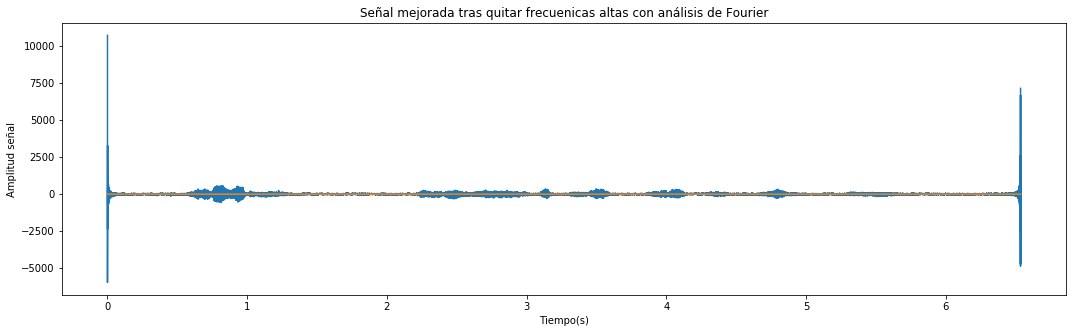

In [12]:
# Ahora grafiamosla señal obtenida y la guardamos en un archivo de audio.
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(tiempo,SeñalMejorada.real)
ax.plot(tiempo,SeñalMejorada.imag)
ax.set_xlabel('Tiempo(s)')
ax.set_ylabel('Amplitud señal')
ax.set_title('Señal mejorada tras quitar frecuenicas altas con análisis de Fourier')


In [13]:
# Guardamos nuestra señal Mejorada
SeñalLimpia = SeñalMejorada.real
wavfile.write("SeñalLimpia.wav",TasaDatos,SeñalLimpia)

In [14]:
# Finalmente escuchamos nuestro audio.
Audio('SeñalLimpia.wav')

In [15]:
# Parte 3.e
# Ahora que hemos limpiado la señal, invirtamos el mensaje y decodifiquemos el mensaje.
Decodificacion = SeñalLimpia[::-1]
wavfile.write("MensajeDecodificado.wav",TasaDatos,Decodificacion)

In [16]:
# Finalmente descubrimos el mensaje decodificado
Audio('MensajeDecodificado.wav')

In [17]:
print("El mensaje decodificado es: Mi nombre es Felipe Leonardo al reves ")

El mensaje decodificado es: Mi nombre es Felipe Leonardo al reves 
